In [35]:
from pathlib import Path
import os

# Establece la raíz del proyecto manualmente
project_root = Path("F:/JCMDataCenter/Cursos/Evolve Academy/Data Scientist IA/Futpeak") # sobremesa
#project_root = Path("C:/Users/juanm/Desktop/FUTPEAK/Futpeak") # portátil

# Cambia el directorio de trabajo actual a esa raíz
os.chdir(project_root)

print("📁 Directorio de trabajo actual:", Path.cwd())

📁 Directorio de trabajo actual: F:\JCMDataCenter\Cursos\Evolve Academy\Data Scientist IA\Futpeak


# ETAPA 1 — Carga y exploración de los datos

En esta primera etapa, cargamos los archivos `matchlogs` y `metadata`, que contienen información por partido y por jugador, respectivamente.

Nuestro objetivo aquí no es solo cargar los datos, sino **entender qué columnas hay, qué tipo de variables contiene cada una, y cuáles vamos a usar o descartar**.

### ¿Qué buscamos al explorar?
- Qué columnas tienen valores nulos
- Qué columnas son categóricas, numéricas o de fecha
- Si hay identificadores únicos (`Player_ID`)
- Qué variables nos pueden servir para el modelo

Vamos a centrarnos en **variables relacionadas con el rendimiento en el campo**, y **descartar muchas otras que no aportan directamente al objetivo de predecir la evolución del jugador**.



In [60]:
import pandas as pd

# Load datasets
df_matchlogs = pd.read_csv("data/processed/cleaned_matchlogs.csv")
df_metadata = pd.read_csv("data/processed/cleaned_metadata.csv")

# Show general info for structure
print("🔍 Matchlogs structure:")
df_matchlogs.info()

print("\n🧾 Metadata structure:")
df_metadata.info()

# Preview a few rows
df_matchlogs.head()


🔍 Matchlogs structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368257 entries, 0 to 368256
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Player_name            368257 non-null  object 
 1   Player_ID              368257 non-null  object 
 2   Seasons                368257 non-null  object 
 3   Date                   368257 non-null  object 
 4   Day                    368257 non-null  object 
 5   Competition            368257 non-null  object 
 6   Round                  368257 non-null  object 
 7   Home_Away              368257 non-null  object 
 8   Result                 368257 non-null  object 
 9   Player_team            368257 non-null  object 
 10  Rival_team             368257 non-null  object 
 11  Start                  368257 non-null  object 
 12  Position               283886 non-null  object 
 13  Minutes                367852 non-null  float64
 14  Goals        

,Player_name,Player_ID,Seasons,Date,Day,Competition,Round,Home_Away,Result,Player_team,...,x_assisted_G,Shot_creating_actions,Goal_creating_actions,Passes_completed,Passes_att,Percent_passes,Progressive_passes,Feet_control,Progressive_control,Dribling_suc
0,Luciano Abecasis,6c510f2d,2016,2016-02-05,Fri,Primera Div,Matchweek 1,Away,L 0–1,Godoy Cruz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Luciano Abecasis,6c510f2d,2016,2016-02-12,Fri,Primera Div,Matchweek 2,Home,D 1–1,Godoy Cruz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Luciano Abecasis,6c510f2d,2016,2016-02-18,Thu,Primera Div,Matchweek 3,Away,W 2–1,Godoy Cruz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Luciano Abecasis,6c510f2d,2016,2016-02-21,Sun,Primera Div,Matchweek 4,Home,W 4–1,Godoy Cruz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Luciano Abecasis,6c510f2d,2016,2016-02-26,Fri,Primera Div,Matchweek 5,Away,W 3–2,Godoy Cruz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# View all columns in matchlogs
print("🔧 All columns in matchlogs:")
print(df_matchlogs.columns.tolist())


df_matchlogs 



🔧 All columns in matchlogs:
['Player_name', 'Player_ID', 'Seasons', 'Date', 'Day', 'Competition', 'Round', 'Home_Away', 'Result', 'Player_team', 'Rival_team', 'Start', 'Position', 'Minutes', 'Goals', 'Assists', 'Penalty_kick', 'Penalty_kick_att', 'Shots', 'Shots_on_target', 'Yellow_cards', 'Red_cards', 'Fouls_committed', 'Fouls_drawn', 'Offsides', 'Crosses', 'Tackles_won', 'Interceptions', 'Own_goals', 'Penaltys_won', 'Penaltys_conceded', 'Touches', 'Tackles', 'Blocks', 'xG', 'non_penalty_xG', 'x_assisted_G', 'Shot_creating_actions', 'Goal_creating_actions', 'Passes_completed', 'Passes_att', 'Percent_passes', 'Progressive_passes', 'Feet_control', 'Progressive_control', 'Dribling_suc']


,Player_name,Player_ID,Seasons,Date,Day,Competition,Round,Home_Away,Result,Player_team,...,x_assisted_G,Shot_creating_actions,Goal_creating_actions,Passes_completed,Passes_att,Percent_passes,Progressive_passes,Feet_control,Progressive_control,Dribling_suc
0,Luciano Abecasis,6c510f2d,2016,2016-02-05,Fri,Primera Div,Matchweek 1,Away,L 0–1,Godoy Cruz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Luciano Abecasis,6c510f2d,2016,2016-02-12,Fri,Primera Div,Matchweek 2,Home,D 1–1,Godoy Cruz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Luciano Abecasis,6c510f2d,2016,2016-02-18,Thu,Primera Div,Matchweek 3,Away,W 2–1,Godoy Cruz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Luciano Abecasis,6c510f2d,2016,2016-02-21,Sun,Primera Div,Matchweek 4,Home,W 4–1,Godoy Cruz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Luciano Abecasis,6c510f2d,2016,2016-02-26,Fri,Primera Div,Matchweek 5,Away,W 3–2,Godoy Cruz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368252,Dominic Gape,f744b4df,2023-2024,2023-12-26,Tue,League Two,Matchweek 24,Away,W 1–0,Sutton United,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368253,Dominic Gape,f744b4df,2023-2024,2024-01-01,Mon,League Two,Matchweek 26,Home,D 1–1,Sutton United,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368254,Dominic Gape,f744b4df,2023-2024,2024-01-06,Sat,FA Cup,Third round proper,Away,L 1–3,Sutton United,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368255,Dominic Gape,f744b4df,2023-2024,2024-02-10,Sat,League One,Matchweek 32,Home,D 1–1,Northampton,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ETAPA 2 — Filtrado de jugadores ofensivos y cálculo del debut

No todos los jugadores tienen el mismo tipo de rendimiento ni las mismas estadísticas.  
En este proyecto, **nos centramos en jugadores ofensivos y mediocampistas**, porque son los que aportan goles, asistencias y tiros (las métricas que usaremos para valorar el rendimiento).

Además, para poder analizar la progresión desde el inicio de la carrera, necesitamos:
- Detectar el **primer partido profesional (debut)**.
- Calcular desde entonces en qué año de carrera está cada jugador en cada partido.

También calcularemos la edad del jugador en cada partido, porque **la edad es una variable predictiva clave** para el tipo de evolución que tendrá.


In [38]:
POSITION_GROUPS = {
    'GOALKEEPER': ['GK'],

    'DEFENSIVE': [
        'CB',    # Center Back
        'LB',    # Left Back
        'RB',    # Right Back
        'FB',    # Fullback
        'LWB',   # Left Wing Back
        'RWB',   # Right Wing Back
        'SW',    # Sweeper
        'D'      # Generic Defender
    ],

    'MIDFIELD': [
        'CM',    # Center Midfielder
        'DM',    # Defensive Midfielder
        'MF',     # Generic Midfielder
        'AM'     # Attacking Midfielder (can also be attacking, but here consider control of juego)
    ],

    'ATTACKING': [
        'CF',    # Center Forward
        'ST',    # Striker
        'F',     # Generic Forward
        'FW',    # Forward (alternative code)
        'LW',    # Left Wing
        'RW',    # Right Wing
        'WF',    # Wing Forward
        'IF',    # Inside Forward
        'OL',    # Outside Left
        'OR'     # Outside Right
    ]
}


In [62]:
# Define relevant positions for attacking/midfield players
target_positions = POSITION_GROUPS['MIDFIELD'] + POSITION_GROUPS['ATTACKING']

# Create a function to check if position is relevant
def is_target_position(pos):
    if pd.isna(pos):
        return False
    return any(p in pos.split('-') for p in target_positions)

# Filter metadata to only include target players
df_metadata['Is_Target'] = df_metadata['Position'].apply(is_target_position)
df_metadata_target = df_metadata[df_metadata['Is_Target']]

# Filter matchlogs for selected players
target_ids = df_metadata_target['Player_ID'].unique()
df_matchlogs_target = df_matchlogs[df_matchlogs['Player_ID'].isin(target_ids)].copy()


In [63]:
# Convert Date columns to datetime
df_matchlogs_target['Date'] = pd.to_datetime(df_matchlogs_target['Date'], errors='coerce')
df_metadata['Birth_date'] = pd.to_datetime(df_metadata['Birth_date'], errors='coerce')

# Merge Birth_date into matchlogs
df_matchlogs_target = df_matchlogs_target.merge(
    df_metadata[['Player_ID', 'Birth_date']],
    on='Player_ID', how='left'
)

# Calcular debut por jugador (primer partido con minutos > 0)
debut_dates = df_matchlogs_target[df_matchlogs_target['Minutes'] > 0].groupby('Player_ID')['Date'].min()
df_matchlogs_target['Debut_date'] = df_matchlogs_target['Player_ID'].map(debut_dates)

# Calcular año relativo desde el debut
df_matchlogs_target['year_since_debut'] = (
    (df_matchlogs_target['Date'] - df_matchlogs_target['Debut_date']).dt.days // 365 + 1
)

# Calcular edad en el partido
df_matchlogs_target['age'] = (
    (df_matchlogs_target['Date'] - df_matchlogs_target['Birth_date']).dt.days / 365.25
)


# ETAPA 3 — Cálculo del rendimiento ofensivo por partido

Queremos transformar las estadísticas individuales (goles, asistencias, tiros, tarjetas...) en **una única métrica de rendimiento**.  
Esta métrica nos permitirá comparar partidos entre sí de manera más objetiva.

Además, vamos a normalizar esta métrica por 90 minutos.  
¿Por qué? Porque jugar 15 minutos y marcar un gol no equivale a jugar 90 y marcar uno. **Necesitamos ajustar el rendimiento al tiempo jugado.**

### Fórmula propuesta:
- +5 por cada gol
- +4 por asistencia
- +0.5 por tiro a puerta
- +0.1 por tiro fuera
- -1 por amarilla
- -2 por roja

El resultado se divide por los minutos jugados y se multiplica por 90 → rendimiento por 90 minutos.


In [64]:
# Fill missing values with 0
cols = ['Goals', 'Assists', 'Shots', 'Shots_on_target', 'Yellow_cards', 'Red_cards', 'Minutes']
df_matchlogs_target[cols] = df_matchlogs_target[cols].fillna(0)

# Function to compute performance rating
def calculate_rating(row):
    score = (
        row['Goals'] * 5 +
        row['Assists'] * 4 +
        row['Shots_on_target'] * 0.5 +
        (row['Shots'] - row['Shots_on_target']) * 0.1 -
        row['Yellow_cards'] * 1 -
        row['Red_cards'] * 2
    )
    return score / (row['Minutes'] / 90) if row['Minutes'] > 0 else 0

# Apply to dataset
df_matchlogs_target['rating_per_90'] = df_matchlogs_target.apply(calculate_rating, axis=1)


# ETAPA 4 — Agregación por año y creación de la trayectoria del jugador

Ahora que ya tenemos el rendimiento de cada partido (`rating_per_90`), necesitamos pasar de datos por partido a **una vista por año** desde el debut.

### ¿Por qué agregamos por año?
Porque queremos ver cómo evoluciona el jugador en su carrera. Si analizamos partido por partido, hay demasiado ruido.

### ¿Qué vamos a calcular por jugador y año?
- Minutos totales jugados
- Goles totales
- Asistencias totales
- Media de `rating_per_90` del año
- Edad promedio ese año

Este dataset será nuestra "foto" anual del jugador, y servirá para modelar su evolución.


In [65]:
# Group by player and year since debut
career_df = df_matchlogs_target.groupby(['Player_ID', 'year_since_debut']).agg({
    'Minutes': 'sum',
    'Goals': 'sum',
    'Assists': 'sum',
    'rating_per_90': 'mean',
    'age': 'mean'  # Edad promedio ese año
}).reset_index()


# ETAPA 5 — Detección del año de pico y clasificación de tipo de carrera

Para predecir cómo será la evolución de un jugador, primero tenemos que saber **cómo fue la de los jugadores históricos**.

Aquí vamos a:
1. Detectar el **año de pico** de cada jugador, es decir, el año en el que tuvo su mejor rendimiento (`rating_per_90`).
2. Clasificar ese año como:
   - `temprano` si ocurrió en los primeros 2 años
   - `medio` si ocurrió entre los años 3 y 4
   - `tardío` si ocurrió en el año 5 o más

Esto se convertirá en nuestra **variable objetivo (`target`)**. Es lo que el modelo intentará predecir.

Además, filtraremos los años con muy pocos minutos jugados, ya que pueden dar lugar a "falsos picos".


In [66]:
# Filtrar años con suficiente tiempo jugado (evita picos engañosos)
valid_seasons = career_df[career_df['Minutes'] >= 300]

# Buscar el año con mejor rating por jugador
peak_info = (
    valid_seasons.sort_values(['Player_ID', 'rating_per_90'], ascending=[True, False])
    .groupby('Player_ID')
    .first()
    .reset_index()
    .rename(columns={'year_since_debut': 'peak_year', 'rating_per_90': 'peak_rating'})
)

# Unir esta info a la trayectoria completa
career_with_peak = career_df.merge(
    peak_info[['Player_ID', 'peak_year', 'peak_rating']],
    on='Player_ID', how='left'
)

# Clasificar el tipo de carrera según el año de pico
def assign_peak_group(y):
    if y <= 3:
        return "temprano"
    elif y <= 7:
        return "medio"
    else:
        return "tardío"

# Aplicar clasificación
career_with_peak['peak_group'] = career_with_peak['peak_year'].apply(assign_peak_group)


# ETAPA 6 — Preparación del dataset de entrenamiento

En esta etapa vamos a construir el dataset que usaremos para entrenar el modelo.

### ¿Qué haremos?
- Seleccionar los primeros **5 años** de cada jugador desde su debut
- Crear una tabla donde cada fila es un jugador y cada columna representa su rendimiento, edad y minutos en cada uno de esos años
- Calcular también el **crecimiento de rendimiento** entre años

Esto nos dará las variables de entrada (`X`). Ya tenemos el grupo (`peak_group`) como variable objetivo (`y`).


In [68]:
# === Filtrar primeros 3 años de cada jugador
early_years = career_with_peak[career_with_peak['year_since_debut'] <= 3]

# === Pivot: rendimiento, edad y minutos por año
pivot_rating = early_years.pivot(index='Player_ID', columns='year_since_debut', values='rating_per_90')
pivot_age = early_years.pivot(index='Player_ID', columns='year_since_debut', values='age')
pivot_minutes = early_years.pivot(index='Player_ID', columns='year_since_debut', values='Minutes')

# === Renombrar columnas
pivot_rating.columns = [f'rating_year_{i}' for i in pivot_rating.columns]
pivot_age.columns = [f'age_year_{i}' for i in pivot_age.columns]
pivot_minutes.columns = [f'minutes_year_{i}' for i in pivot_minutes.columns]

# === Unir todo
pivot_combined = pd.concat([pivot_rating, pivot_age, pivot_minutes], axis=1).fillna(0)

# === Features de evolución y resumen
pivot_combined["growth_2_1"] = pivot_combined["rating_year_2"] - pivot_combined["rating_year_1"]
pivot_combined["growth_3_2"] = pivot_combined["rating_year_3"] - pivot_combined["rating_year_2"]
pivot_combined["avg_rating"] = pivot_combined[[f"rating_year_{i}" for i in range(1, 4)]].mean(axis=1)
pivot_combined["rating_std"] = pivot_combined[[f"rating_year_{i}" for i in range(1, 4)]].std(axis=1)
pivot_combined["avg_age"] = pivot_combined[[f"age_year_{i}" for i in range(1, 4)]].mean(axis=1)
pivot_combined["sum_minutes"] = pivot_combined[[f"minutes_year_{i}" for i in range(1, 4)]].sum(axis=1)

# === Edad al debut y edad relativa
career_with_peak["age_at_debut"] = career_with_peak.groupby("Player_ID")["age"].transform("min")
pivot_combined["age_rel_year_1"] = pivot_combined["age_year_1"] - career_with_peak.groupby("Player_ID")["age"].first().values

# === Ratio minutos / edad
pivot_combined["minutes_per_age_ratio_1"] = pivot_combined["minutes_year_1"] / (pivot_combined["age_year_1"] + 1)

# === Flags y valores extremos
pivot_combined["has_3_years"] = (pivot_combined["rating_year_3"] > 0).astype(int)
pivot_combined["early_rating_max"] = pivot_combined[[f"rating_year_{i}" for i in range(1, 4)]].max(axis=1)

# === Nuevas señales de tendencia (útiles para LightGBM)
pivot_combined["rating_trend"] = pivot_combined["growth_3_2"] - pivot_combined["growth_2_1"]
pivot_combined["age_gap"] = pivot_combined["age_year_3"] - pivot_combined["age_year_1"]
pivot_combined["minutes_trend"] = pivot_combined["minutes_year_3"] - pivot_combined["minutes_year_1"]

# === Merge con clase objetivo
model_df = pivot_combined.merge(
    career_with_peak[["Player_ID", "peak_group"]],
    on="Player_ID",
    how="inner"
)

print("✅ Dataset de entrenamiento creado:", model_df.shape)
model_df.head()


✅ Dataset de entrenamiento creado: (11826, 27)


,Player_ID,rating_year_0,rating_year_1,rating_year_2,rating_year_3,age_year_0,age_year_1,age_year_2,age_year_3,minutes_year_0,...,avg_age,sum_minutes,age_rel_year_1,minutes_per_age_ratio_1,has_3_years,early_rating_max,rating_trend,age_gap,minutes_trend,peak_group
0,005ca692,0.0,0.984239,0.723346,1.309816,0.0,19.073563,20.098302,21.114648,0.0,...,20.095504,7473.0,0.0,74.027713,1,1.309816,0.847362,2.041084,1221.0,medio
1,005ca692,0.0,0.984239,0.723346,1.309816,0.0,19.073563,20.098302,21.114648,0.0,...,20.095504,7473.0,0.0,74.027713,1,1.309816,0.847362,2.041084,1221.0,medio
2,005ca692,0.0,0.984239,0.723346,1.309816,0.0,19.073563,20.098302,21.114648,0.0,...,20.095504,7473.0,0.0,74.027713,1,1.309816,0.847362,2.041084,1221.0,medio
3,005ca692,0.0,0.984239,0.723346,1.309816,0.0,19.073563,20.098302,21.114648,0.0,...,20.095504,7473.0,0.0,74.027713,1,1.309816,0.847362,2.041084,1221.0,medio
4,005ca692,0.0,0.984239,0.723346,1.309816,0.0,19.073563,20.098302,21.114648,0.0,...,20.095504,7473.0,0.0,74.027713,1,1.309816,0.847362,2.041084,1221.0,medio


In [69]:
print(model_df["peak_group"].value_counts(normalize=True))


peak_group
medio       0.418569
tardío      0.354896
temprano    0.226535
Name: proportion, dtype: float64


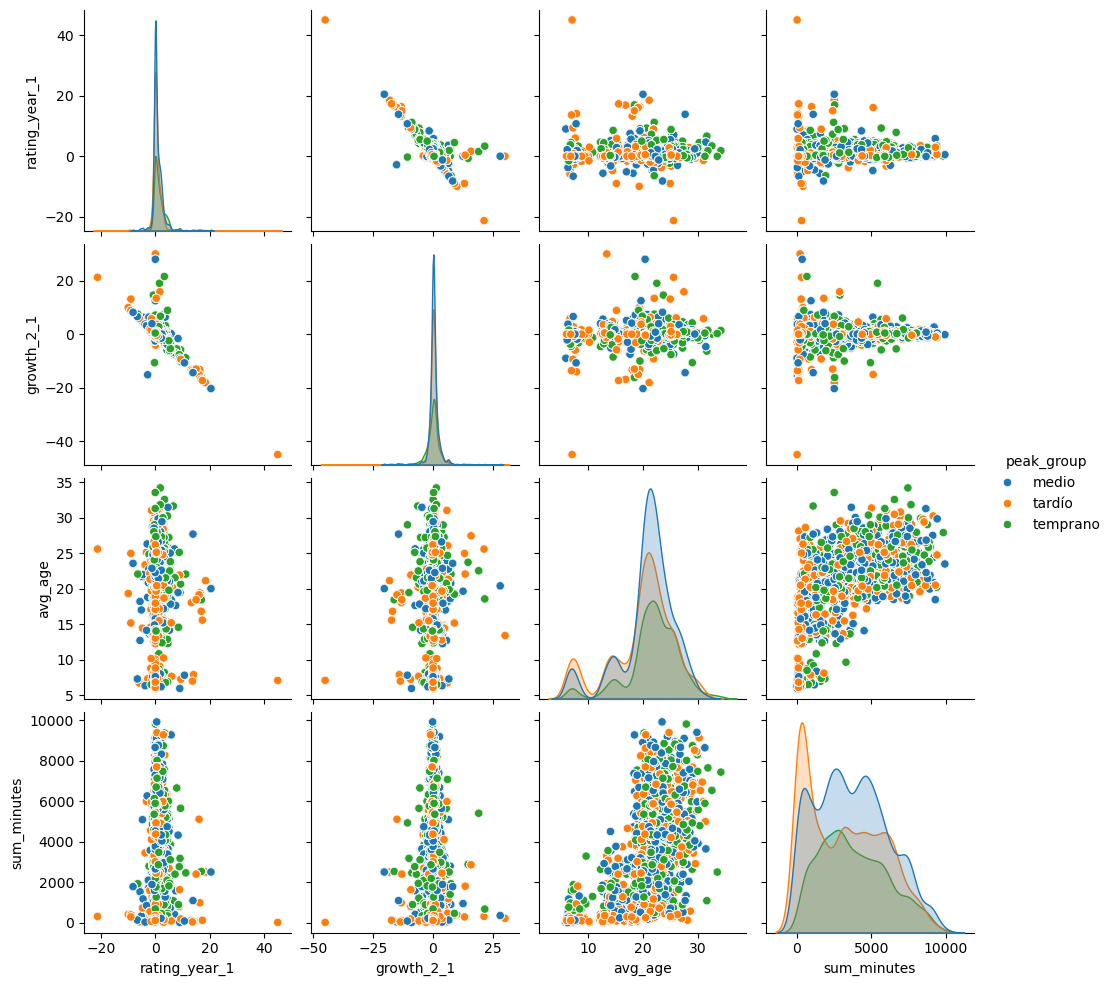

In [48]:
import seaborn as sns

sns.pairplot(model_df,
             vars=["rating_year_1", "growth_2_1", "avg_age", "sum_minutes"],
             hue="peak_group")



🔁 Fold 1
✅ Dataset balanceado con SMOTE
peak_group
medio       4026
tardío      4026
temprano    4026
Name: count, dtype: int64
⚖️  Pesos usados: {'medio': 2.349726775956284, 'tardío': 2.793857058476078, 'temprano': 4.619140625}
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000561 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4827
[LightGBM] [Info] Number of data points in the train set: 12078, number of used features: 19
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

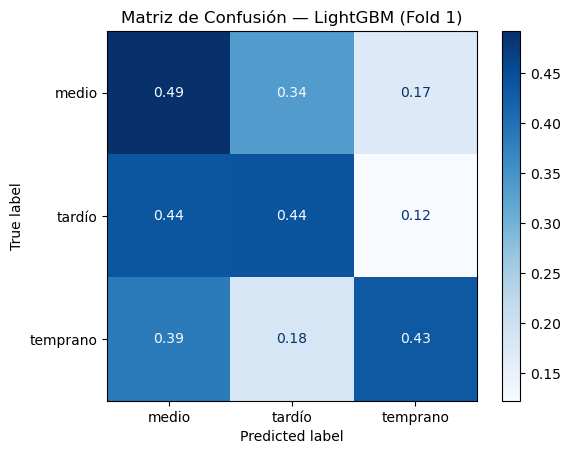


🔁 Fold 2
✅ Dataset balanceado con SMOTE
peak_group
medio       3965
tardío      3965
temprano    3965
Name: count, dtype: int64
⚖️  Pesos usados: {'medio': 2.386128625472888, 'tardío': 2.8765582243843113, 'temprano': 4.286814680561849}
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000533 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4835
[LightGBM] [Info] Number of data points in the train set: 11895, number of used features: 19
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

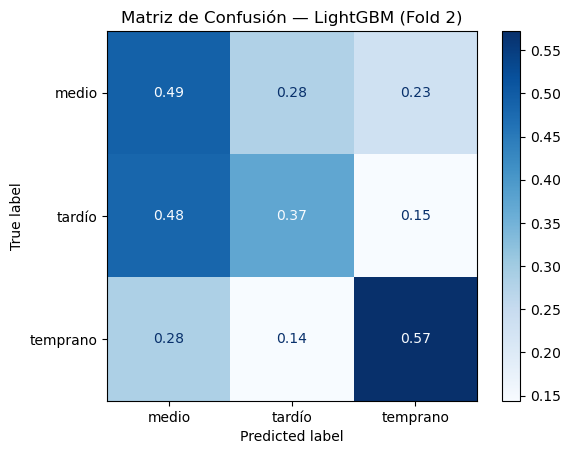


🔁 Fold 3
✅ Dataset balanceado con SMOTE
peak_group
tardío      3942
medio       3942
temprano    3942
Name: count, dtype: int64
⚖️  Pesos usados: {'medio': 2.400050735667174, 'tardío': 2.7785609397944198, 'temprano': 4.475402081362346}
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000549 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4832
[LightGBM] [Info] Number of data points in the train set: 11826, number of used features: 19
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

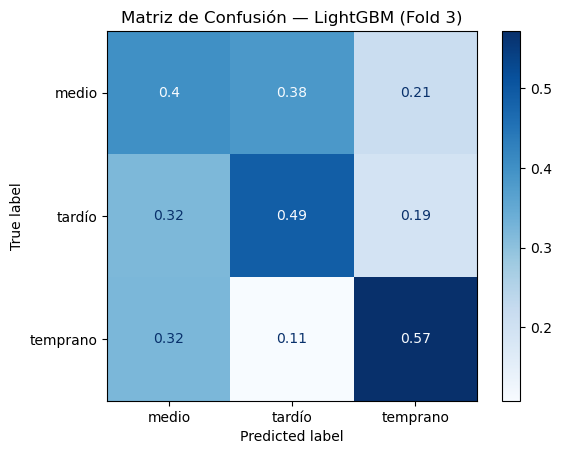


🔁 Fold 4
✅ Dataset balanceado con SMOTE
peak_group
medio       3912
tardío      3912
temprano    3912
Name: count, dtype: int64
⚖️  Pesos usados: {'medio': 2.4184560327198366, 'tardío': 2.8157738095238094, 'temprano': 4.322064869803563}
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4836
[LightGBM] [Info] Number of data points in the train set: 11736, number of used features: 19
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

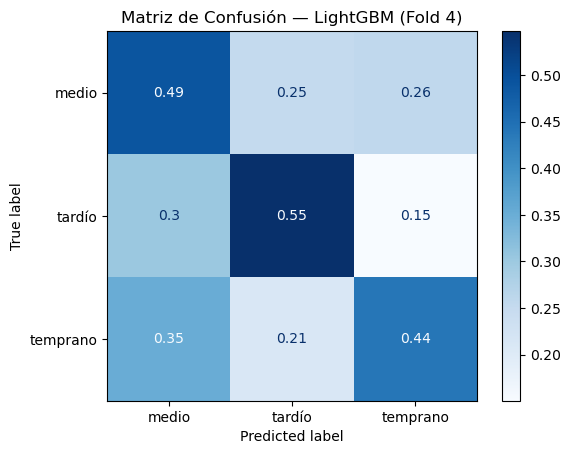


🔁 Fold 5
✅ Dataset balanceado con SMOTE
peak_group
medio       3955
tardío      3955
temprano    3955
Name: count, dtype: int64
⚖️  Pesos usados: {'medio': 2.3921618204804043, 'tardío': 2.8258661887694143, 'temprano': 4.3841519925857275}
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000591 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4833
[LightGBM] [Info] Number of data points in the train set: 11865, number of used features: 19
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

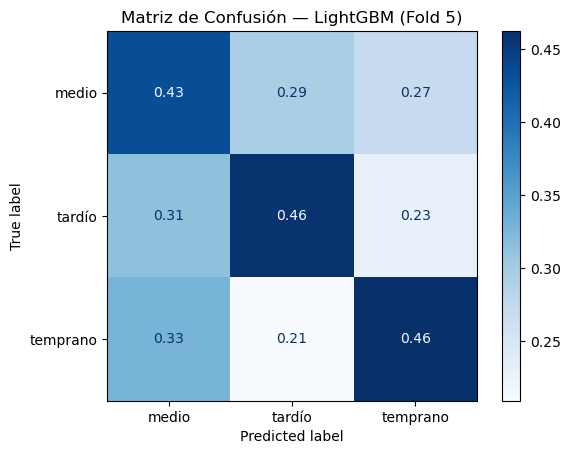

In [70]:
from sklearn.model_selection import GroupKFold
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score, matthews_corrcoef, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import numpy as np

# === Definir features y target
features = [
    'rating_year_1', 'rating_year_2', 'rating_year_3',
    'growth_2_1', 'growth_3_2', 'rating_trend',
    'avg_rating', 'rating_std', 'early_rating_max',
    'age_year_1', 'age_year_2', 'age_year_3', 'avg_age', 'age_gap',
    'minutes_year_1', 'minutes_year_2', 'minutes_year_3', 'sum_minutes', 'minutes_trend'
]

X = model_df[features]
y = model_df["peak_group"]
groups = model_df["Player_ID"]

gkf = GroupKFold(n_splits=5)
accs, kappas, mccs = [], [], []

for fold, (train_idx, test_idx) in enumerate(gkf.split(X, y, groups)):
    print(f"\n🔁 Fold {fold+1}")
    
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # === Balancear con SMOTE
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    print("✅ Dataset balanceado con SMOTE")
    print(y_train_resampled.value_counts())

    # === Calcular pesos manuales
    class_counts = y_train.value_counts(normalize=True)
    class_weights = {cls: 1.0 / freq for cls, freq in class_counts.items()}
    print(f"⚖️  Pesos usados: {class_weights}")

    # === Entrenar modelo con LGBMClassifier
    
    lgbm_model = LGBMClassifier(
    objective="multiclass",
    class_weight="balanced",
    n_estimators=120,  # 🔧 aquí el cambio
    learning_rate=0.03,
    max_depth=6,
    eval_metric="multi_logloss",
    random_state=42
)


    lgbm_model.fit(
    X_train_resampled, y_train_resampled,
    eval_set=[(X_test, y_test)],
    
)

    # === Predicción
    y_pred = lgbm_model.predict(X_test)

    # === Evaluación
    acc = accuracy_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    accs.append(acc)
    kappas.append(kappa)
    mccs.append(mcc)

    print(f"✅ Accuracy: {acc:.3f} | Kappa: {kappa:.3f} | MCC: {mcc:.3f}")
    print(classification_report(y_test, y_pred))

    # === Matriz de confusión
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred,
        display_labels=lgbm_model.classes_,
        cmap='Blues',
        normalize='true'
    )
    plt.title(f"Matriz de Confusión — LightGBM (Fold {fold+1})")
    plt.grid(False)
    plt.show()
